<a href="https://colab.research.google.com/github/FelipeMu/memoria2024-testing/blob/main/test1_signals-parametrizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conexión a Google drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura de archivo
 Se procede a leer el archivo con extensión '.csv' - señal de PAM y VFSC (sujeto G1)

In [55]:
import csv
import os
# version3.0
import pywt
import numpy as np
import matplotlib.pyplot as plt


# Arreglo para almcenar los datos de las senales
pam = [] # PAM: Presión Arterial Media
vsc = [] # VSC: Velocidad Sanguínea Cerebral

#=================================================

folder_csv = '/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/'
files_csv = os.listdir(folder_csv)


# Visualizar los archivos existentes
print('Archivos encontrados:\n')
print(files_csv)

# Se procede a almacenar cada archivo .csv en un diccionario y luego en un arreglo de senales
signals = []
for each_csv in files_csv:
    dicc_signal_aux = {}

    carpeta_csv = '/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/'
    archivo_csv = each_csv
    #concatenar ruta y csv para acceder a los datos
    ruta_archivo = os.path.join(carpeta_csv, archivo_csv)
    # lectura de los archivos


    # Arreglo para almcenar los datos de las senales
    pam = [] # PAM: Presión Arterial Media
    vsc = [] # VSC: Velocidad Sanguínea Cerebral

    # Abre el archivo CSV en modo lectura
    with open(ruta_archivo, newline='') as csvfile:
        # Lee el archivo CSV usando el lector CSV
        csv_reader = csv.reader(csvfile)

        # Itera sobre cada fila en el archivo CSV
        for row in csv_reader:
            # Cada fila se convierte en una lista de valores, donde cada valor representa una celda en esa fila
            pam.append(row[0])
            vsc.append(row[1])

    #Se elimina los nombre de las filas PAM y VFSC que estaban contenidas dentro de los arreglos
    del pam[0]
    del vsc[0]

    pam = np.array(pam)
    pam = pam.astype(np.float64)

    vsc = np.array(vsc)
    vsc = vsc.astype(np.float64)

    # se guarda el nombre del archivo y la senal de pam en el diccioanrio
    dicc_signal_aux['name_file'] = each_csv
    dicc_signal_aux['signal_pam'] = pam
    dicc_signal_aux['signal_vsc'] = vsc




    signals.append(dicc_signal_aux)


print('\n**** mostrando el arreglo de diccionarios de csv****\n')

# verificnado contenidos del arreglo de diccionarios de csv's
for dicc in signals:
  print('nombre del archivo: ',dicc['name_file'])
  print('señal PAM: ', dicc['signal_pam'], '- N° de instancias', len(dicc['signal_pam']))
  print('señal vsc: ', dicc['signal_vsc'], '- N° de instancias', len(dicc['signal_vsc']))
  print('----------------------------------------')






Archivos encontrados:

['G2_001.csv', 'G2_002.csv']

**** mostrando el arreglo de diccionarios de csv****

nombre del archivo:  G2_001.csv
señal PAM:  [126.63 124.02 121.81 ... 113.27 113.07 113.23] - N° de instancias 1492
señal vsc:  [60.79 58.59 56.76 ... 49.67 49.5  49.7 ] - N° de instancias 1492
----------------------------------------
nombre del archivo:  G2_002.csv
señal PAM:  [113.86 113.3  112.95 ... 125.48 125.83 126.15] - N° de instancias 1494
señal vsc:  [54.16 52.44 50.75 ... 61.72 61.74 61.97] - N° de instancias 1494
----------------------------------------


In [ ]:
#respaldo antes de parametrizar

#=================================================


# Abre el archivo CSV en modo lectura
#with open('/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/G2_002.csv', newline='') as csvfile:
    # Lee el archivo CSV usando el lector CSV
#    csv_reader = csv.reader(csvfile)

    # Itera sobre cada fila en el archivo CSV
#    for row in csv_reader:
#        # Cada fila se convierte en una lista de valores, donde cada valor representa una celda en esa fila
#        G1_PAM.append(row[0])
#        G1_VSC.append(row[1])
#Se elimina los nombre de las filas PAM y VFSC que estaban contenidas dentro de los arreglos
#del G1_PAM[0]
#del G1_VSC[0]

#G1_PAM = np.array(G1_PAM)
#G1_PAM = G1_PAM.astype(np.float64)

# Preprocesamiento
Se analizan los datos del archivo '.csv' antes de los respectivos análisis

In [58]:
# Se procede a realizar preprocesamiento de los datos a estudiar

# Se analizan si tienen el mismo largo ambos arreglos de la senal G1
for dicc in signals:
  len_distinto = False
  if len(dicc['signal_pam']) != len(dicc['signal_vsc']):
    len_distinto = True
    print('Arreglos PAM y VSC con distinto largo.\n')


  # Verificacion de valores nulos:
  i = 0
  vacios_PAM = 0
  vacios_VSC = 0
  while (i < len(dicc['signal_pam'])):
    if dicc['signal_pam'][i] == '':
      vacios_PAM = vacios_PAM + 1
    if dicc['signal_vsc'][i] == '':
      vacios_VSC = vacios_VSC + 1
    i = i + 1
  # Revision de valores nulos en el arreglo de la senal PAM
  if vacios_PAM != 0:
    print('Arreglo señal PAM con ', vacios_PAM, 'vacíos.\n')
  # Revision de valores nulos en el arreglo de la senal VSC
  if vacios_VSC != 0:
    print('Arreglo señal VSC con ', vacios_VSC, 'vacíos.\n')


# Aplicación de la transformada Wavelet
**¿Que realiza la T.Wavelet?**
La transformación de la WT se realiza a través de una función llamada wavelet (o wavelet madre), con la que se descompone una señal en diferentes componentes de frecuencia que conforman una familia de funciones que son traslaciones y dilataciones de una función madre ψ (t). Este proceso de traslación y dilatación.



Se estudia cúal de las familias de la T.Wavelets (Wavelets families) es la que genera menor error al aplicar su T. wavelet inversa
inf: https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html

**Información de las familias de Wavelets**
La calidad de la información obtenida a partir de un análisis donde se aplica la WT depende en gran medida de la wavelet madre utilizada, de modo que se debe considerar como una "*etapa dentro del análisis*" la selección de una wavelet madre adecuada para cada caso particular de estudio (Gómez etc al., 2013)

**Dado la naturaleza de los datos es utilizará la CWN (Continuous Wavelet Transform).**

**A considerar:**


1.   Longitud de los filtros (Capacidad de capturar detalles finos vs Complejidad computacional)



**A considerar:**
1.   plt.imshow() se utiliza para mostrar la matriz de coeficientes de la CWT como *una imagen*.
2.   La función np.abs() se usa para tomar el valor absoluto de los coeficientes para la visualización.
3.   El argumento cmap='jet' define el mapa de colores que se utilizará para representar la amplitud de los coeficientes.
4.  **Al no tener definida una función de escala, una wavelet determinada no puede ser utilizada en la aplicación de la DWT**

    *   wavelets madres que tienen una función escala definida y por lo tanto es aplicable la "DWT":


1.   Haar (harr)
2.   Daubechies (db)
3.   Symmlets (symN)
4.   Coiflets (coifN)
5.   Biorthogonal (BiorNr.Nd)
6.   Reverse Biorthogonal (rBiorNR.Nd)
7.   Discrete Meyer (dmey)






6.   **coef_approx:** Estos coeficientes capturan las tendencias generales y las componentes de baja frecuencia de la señal.
6.   **coef_details:** Estos coeficientes capturan cambios rápidos o detalles finos en la señal que pueden perderse en la aproximación

(por cada nivel de descomposición se genera un conjunto de coeficientes de aproximación y detalles)

**Desvanecimiento y tamaño de soporte:**
 La propiedad de desvanecimiento dicta que a medida que la frecuencia de una wavelet aumenta, su amplitud disminuye. Esta propiedad está estrechamente relacionada con el soporte de la wavelet. Cuanto más corto sea el soporte de una wavelet en el dominio del tiempo, mayor será su ancho de banda en el dominio de la frecuencia, lo que significa que cubrirá un rango más amplio de frecuencias.

In [12]:

pywt.families()

# Obtener una lista completa de cada familia Wavelets
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))



haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [13]:
# ***************************TESTING**********************************

# version4.0

# 1. ver que wavelet es la que presenta un menor RMSE
# 2. hacer funcion que lea el archivo y cree un diccionario con los archivos encontrados (datos a alamacenar, nombre file,
#    senal original, senal reconstruida, error RMSE)

#estos son las wavelets a utilizar:

#Haar (harr) discrete_families[0]
#Daubechies (db) discrete_families[1]
#Symmlets (symN) discrete_families[2]
#Coiflets (coifN) discrete_families[3]
#Biorthogonal (BiorNr.Nd) discrete_families[4]
#Reverse Biorthogonal (rBiorNR.Nd) discrete_families[5]
#Discrete Meyer (dmey) discrete_families[6]

discrete_families = []
for family in pywt.families():
    discrete_families.append(pywt.wavelist(family))
#Se almacenan solo las familias waveletes discretas que se utilizaran en un arreglo llamado discrete_families
discrete_families = discrete_families[0:7]



# Definir la familia de wavelets y el nivel de descomposicion
# Nombre de funcion: apply_wavelet()
# Descripcion: funcion encargada de aplicar la T.wavelet y T.wavelet inversa discreta
#              a la senal que se esta analizando.
# Entrada:
#   wavelet: es un hijo de de las wavelets madres que funcionan con la DWT
# Salida: -
def apply_wavelet (wavelet):
  level = 1
  # Aplicar la transformada wavelet discreta
  # **Lo normal es primero tener el cA1 y luego el cD1, el coef de aproximacion suele ser parecido a la senal y esta primero**
  coefficients = pywt.wavedec(G1_PAM, wavelet, level=level)
  # Reconstruir la senal a partir de los coeficientes
  reconstructed_signal = pywt.waverec(coefficients, wavelet)
  return reconstructed_signal


def get_rmse(original_signal, predict_signal):
  # Calcular el error absoluto entre la señal original y la reconstruida
  absolute_error = np.abs(original_signal - predict_signal)

  # Calcular el error cuadrático
  squared_error = (original_signal - predict_signal) ** 2

  # Calcular la media del error cuadrático
  mean_squared_error = np.mean(squared_error)

  # Calcular la raíz cuadrada de la media del error cuadrático (RMSE)
  rmse = np.sqrt(mean_squared_error)
  return rmse


# Nombre de funcion: show_signals()
# Descripcion: funcion encargada de mostrar como grafico la senal original y la
#              la senal reconstruida obtenida de la wavelet inversa.
# Entrada:
#   OriginalPam: senal PAM original
#   PredictPam: senal PAM reconstruida
# Salida: -
def show_signals (OriginalPam, PredictPam):
  # Graficar ambas señales
  plt.figure(figsize=(10, 5))
  plt.plot(OriginalPam, label='Señal Original', color='blue', marker='o')
  plt.plot(PredictPam, label='Señal Reconstruida', color='red', marker='x')
  plt.title('Señal PAM Original vs Señal PAM Reconstruida')
  plt.ylabel('Niveles CO2')
  plt.xlabel('Tiempo')
  plt.legend()
  plt.grid(True)
  plt.show()


wavelets_discretes = []
# Estructura del arreglo de diccionarios wavelets_discretes:
#   *familiy_wavelet (tipo de dato: string]: corresponde a un hijo de una wavelet madre discreta
#   *signal_rec (tipo de dato: array): corresponde a la senal reconstruida a partir de la aplicacion
#               de la T.wavelet inversa.
#   *error_wavelet (tipo de dato: float): corresponde al error RMSE. error promedio entre la senal
#                                        original y la senal reconstruida.


for family in discrete_families:
  for children in family:
    dicc_aux = {}
    # se aplican todos los hijos de la wavelet madre
    dicc_aux['family_wavelet'] = children
    # se aplica la T.wavelet y la T.wavelet inversa
    dicc_aux['signal_rec'] = apply_wavelet(children)
    # se obtiene el error RMSE
    dicc_aux['error_wavelet'] = get_rmse(G1_PAM, dicc_aux['signal_rec'])
    # se agrega todo lo calculado en el arreglo dicc_discrete en forma de diccionario
    wavelets_discretes.append(dicc_aux)

print(wavelets_discretes)

[{'family_wavelet': 'haar', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.9575886229461225e-14}, {'family_wavelet': 'db1', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.9575886229461225e-14}, {'family_wavelet': 'db2', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.641339986926561e-14}, {'family_wavelet': 'db3', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.537587378797792e-14}, {'family_wavelet': 'db4', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.7272136729539347e-14}, {'family_wavelet': 'db5', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.6844228337421267e-14}, {'family_wavelet': 'db6', 'signal_rec': array([113.86, 113.3 , 112.95, ..., 125.48, 125.83, 126.15]), 'error_wavelet': 1.839763773520591

In [60]:
#TAMOS TESTEANDOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
#####
####
####
###

# ***************************TESTING**********************************

# version4.0

# 1. ver que wavelet es la que presenta un menor RMSE
# 2. hacer funcion que lea el archivo y cree un diccionario con los archivos encontrados (datos a alamacenar, nombre file,
#    senal original, senal reconstruida, error RMSE)

#estos son las wavelets a utilizar:

#Haar (harr) discrete_families[0]
#Daubechies (db) discrete_families[1]
#Symmlets (symN) discrete_families[2]
#Coiflets (coifN) discrete_families[3]
#Biorthogonal (BiorNr.Nd) discrete_families[4]
#Reverse Biorthogonal (rBiorNR.Nd) discrete_families[5]
#Discrete Meyer (dmey) discrete_families[6]

discrete_families = []
for family in pywt.families():
    discrete_families.append(pywt.wavelist(family))
#Se almacenan solo las familias waveletes discretas que se utilizaran en un arreglo llamado discrete_families
discrete_families = discrete_families[0:7]



# Definir la familia de wavelets y el nivel de descomposicion
# Nombre de funcion: apply_wavelet()
# Descripcion: funcion encargada de aplicar la T.wavelet y T.wavelet inversa discreta
#              a la senal que se esta analizando.
# Entrada:
#   wavelet: es un hijo de de las wavelets madres que funcionan con la DWT
# Salida: -
def apply_wavelet (signal_pam, wavelet):
  level = 1
  # Aplicar la transformada wavelet discreta
  # **Lo normal es primero tener el cA1 y luego el cD1, el coef de aproximacion suele ser parecido a la senal y esta primero**
  coefficients = pywt.wavedec(signal_pam, wavelet, level=level)
  # Reconstruir la senal a partir de los coeficientes
  reconstructed_signal = pywt.waverec(coefficients, wavelet)
  return reconstructed_signal


def get_rmse(original_signal, predict_signal):
  # Calcular el error absoluto entre la señal original y la reconstruida
  absolute_error = np.abs(original_signal - predict_signal)

  # Calcular el error cuadrático
  squared_error = (original_signal - predict_signal) ** 2

  # Calcular la media del error cuadrático
  mean_squared_error = np.mean(squared_error)

  # Calcular la raíz cuadrada de la media del error cuadrático (RMSE)
  rmse = np.sqrt(mean_squared_error)
  return rmse


# Nombre de funcion: show_signals()
# Descripcion: funcion encargada de mostrar como grafico la senal original y la
#              la senal reconstruida obtenida de la wavelet inversa.
# Entrada:
#   OriginalPam: senal PAM original
#   PredictPam: senal PAM reconstruida
# Salida: -
def show_signals (OriginalPam, PredictPam):
  # Graficar ambas señales
  plt.figure(figsize=(10, 5))
  plt.plot(OriginalPam, label='Señal Original', color='blue', marker='o')
  plt.plot(PredictPam, label='Señal Reconstruida', color='red', marker='x')
  plt.title('Señal PAM Original vs Señal PAM Reconstruida')
  plt.ylabel('Niveles CO2')
  plt.xlabel('Tiempo')
  plt.legend()
  plt.grid(True)
  plt.show()


wavelets_discretes = []
# Estructura del arreglo de diccionarios wavelets_discretes:
#   *familiy_wavelet (tipo de dato: string]: corresponde a un hijo de una wavelet madre discreta
#   *signal_rec (tipo de dato: array): corresponde a la senal reconstruida a partir de la aplicacion
#               de la T.wavelet inversa.
#   *error_wavelet (tipo de dato: float): corresponde al error RMSE. error promedio entre la senal
#                                        original y la senal reconstruida.

for dicc in signals:
  for family in discrete_families:
    for children in family:
      dicc_aux = {}
      # se aplican todos los hijos de la wavelet madre
      dicc_aux['csv_file'] = dicc['name_file']
      dicc_aux['family_wavelet'] = children
      # se aplica la T.wavelet y la T.wavelet inversa
      dicc_aux['signal_rec'] = apply_wavelet(dicc['signal_pam'],children)
      # se obtiene el error RMSE
      dicc_aux['error_wavelet'] = get_rmse(dicc['signal_pam'], dicc_aux['signal_rec'])
      # se agrega todo lo calculado en el arreglo dicc_discrete en forma de diccionario
      wavelets_discretes.append(dicc_aux)

print(wavelets_discretes)

[{'csv_file': 'G2_001.csv', 'family_wavelet': 'haar', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.9275558140643224e-14}, {'csv_file': 'G2_001.csv', 'family_wavelet': 'db1', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.9275558140643224e-14}, {'csv_file': 'G2_001.csv', 'family_wavelet': 'db2', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.6166906431594088e-14}, {'csv_file': 'G2_001.csv', 'family_wavelet': 'db3', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.4921714937636202e-14}, {'csv_file': 'G2_001.csv', 'family_wavelet': 'db4', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.70511206115227e-14}, {'csv_file': 'G2_001.csv', 'family_wavelet': 'db5', 'signal_rec': array([126.63, 124.02, 121.81, ..., 113.27, 113.07, 113.23]), 'error_wavelet': 1.676

# Selección de la mejor Wavelet madre
Se procede a mostrar todos los errores RMSE calculados en un grafico general y se selecciona la wavelet que presente el mínimo error.

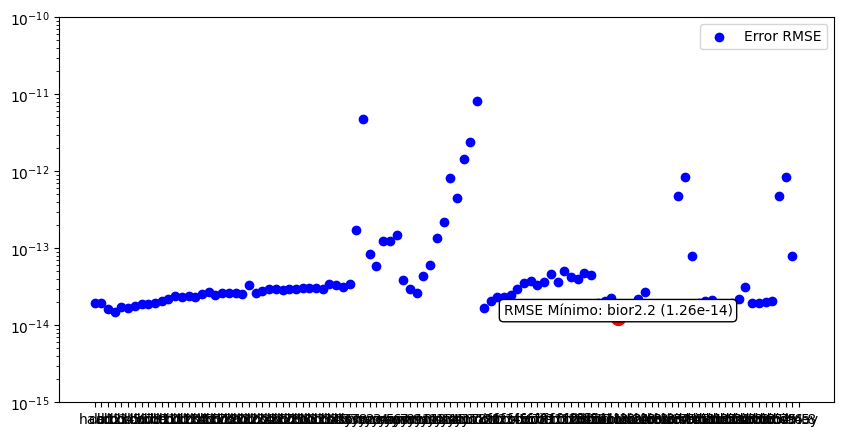

In [62]:
# Extraer errores (probando con la senal G2_001.csv)
errors = []
for dicc in wavelets_discretes:
  if dicc['csv_file'] == 'G2_001.csv':
    errors.append(dicc['error_wavelet'])

# Extraer nombres de wavelets
wavelets_names = []
for dicc in wavelets_discretes:
  if dicc['csv_file'] == 'G2_001.csv':
    wavelets_names.append(dicc['family_wavelet'])


# Ajustar tamaño de la imagen
plt.figure(figsize=(10, 5))

# Crear el gráfico de puntos
plt.scatter(wavelets_names, errors, c='b')

# Calcular el error mínimo
min_error = np.min(errors)

# Encontrar el índice del error mínimo
min_error_index = np.argmin(errors)

# Resaltar el error mínimo
plt.scatter(wavelets_names[min_error_index], errors[min_error_index], c='r', s=100)

# Ajustar el eje Y
plt.ylim([1e-15, 1e-10])
plt.yscale('log', base=10)

# Añadir etiquetas a los puntos
# ... (código de etiquetas, si lo deseas) ...

# Mostrar leyenda
plt.legend(['Error RMSE'])

# Agregar anotación para el error mínimo
min_error_wavelet = wavelets_names[min_error_index]
plt.annotate(f"RMSE Mínimo: {min_error_wavelet} ({min_error:.2e})", (min_error_wavelet, errors[min_error_index]),
             bbox=dict(boxstyle="round", fc="w"), ha="center", va="bottom")


plt.show()